In [3]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
warnings.filterwarnings('ignore')

In [5]:
dataset =pd.read_csv("iris.csv",delim_whitespace=True)

In [6]:
dataset.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
iris           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
dataset['iris'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
dataset['iris'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: iris, dtype: int64

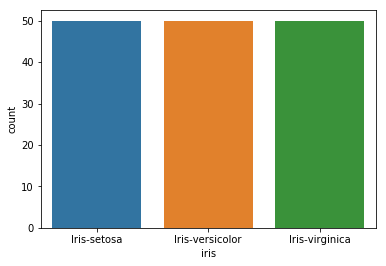

In [10]:
sns.countplot(dataset['iris'])
plt.show()

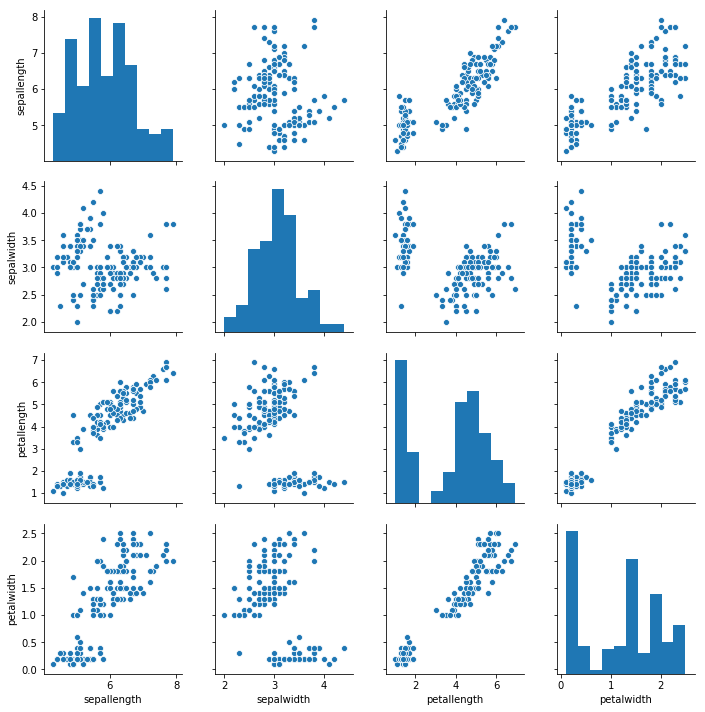

In [11]:
sns.pairplot(dataset)
plt.show()

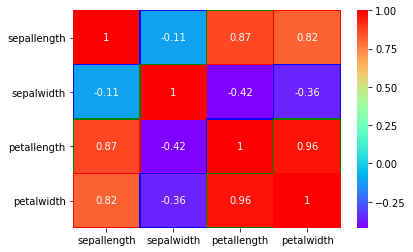

In [12]:
corr=dataset.corr()
sns.heatmap(corr,linewidth=0.5,cmap="rainbow",annot=True,robust=True,linecolor="rbg")
plt.show()

In [13]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
#print(X)
#print(Y)

#split the dataset
validation_score=0.20
seed=7
#scoring='accuracy'
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=validation_score, random_state=seed)

SVC 99.16666666666667 1.1785113019775804
NB 97.5 0.0
DC 95.83333333333334 2.3570226039551554
KNN 99.16666666666667 1.1785113019775804
LogR 94.16666666666667 4.714045207910316
ScaledAdaB 97.5 0.0
ScaledGB 95.0 2.0412414523193125
ScaledRFR 97.5 0.0
ScaledETR 97.5 0.0


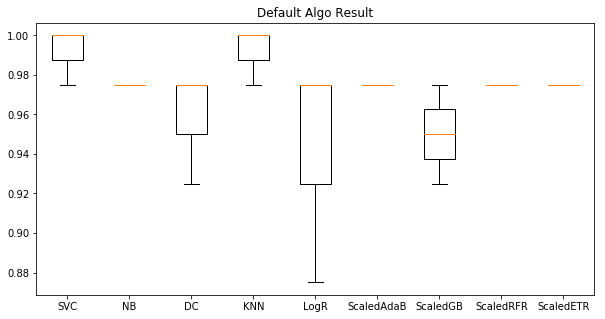

In [14]:
#finding best algo without going into deep
models=[]
models.append(('SVC',SVC()))
models.append(('NB',GaussianNB()))
models.append(('DC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LogR',LogisticRegression()))
models.append(('ScaledAdaB',Pipeline([('Scaler',StandardScaler()),('AdaB',AdaBoostClassifier())])))
models.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingClassifier())])))
models.append(('ScaledRFR',Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestClassifier())])))
models.append(('ScaledETR',Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesClassifier())])))



names=[]
results=[]
for name,model in models:
    kfold=KFold(n_splits=3,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
   # return result_cross_score
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100,cv_results.std()*100)

plt.figure(figsize=(10,5))
ax=plt.subplot()
ax.set_title('Default Algo Result')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.show()

In [15]:
scaled=StandardScaler().fit(X_train)
trans=scaled.transform(X_train)

C_val=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.5,1.8,2.0])
kernal=['linear', 'poly', 'rbf', 'sigmoid']
par_grid=dict(C=C_val,kernel=kernal)
fitmodel=SVC()
kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(trans,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

Best result for gridSearch 0.9833333333333333 {'C': 0.1, 'kernel': 'linear'}


In [16]:
scale=StandardScaler().fit(X_train)
tran=scale.transform(X_train)
model=SVC(C=0.1,kernel='linear',random_state=7)
model.fit(tran,Y_train)

model.fit(tran,Y_train)
trnsF2=scale.transform(X_validation)
decision=model.predict(trnsF2)
finalScore=accuracy_score(decision,Y_validation)
finalScore1=confusion_matrix(decision,Y_validation)
finalScore2=classification_report(decision,Y_validation)
print(finalScore)
print(finalScore1)
print(finalScore2)

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

      micro avg       0.87      0.87      0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [17]:
from sklearn.externals import joblib
joblib.dump(model, 'save_model.pkl')

['save_model.pkl']

In [18]:
save=joblib.load('save_model.pkl')
save

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=7,
  shrinking=True, tol=0.001, verbose=False)